In [129]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import sounddevice as sd
import soundfile as sf

# Project 1

## Introduction
In this project we will have a look at the theory behind discrete fourier transform, and how it can be used for signal and sound processing. Fourier series is a mathematical tool that allows us to represent a function as a sum of sines and cosines. Giving functions a triginometric identity can be useful in many ways, for example in signal processing. 
When getting a signal one can use fourier transformation to get the frequency spectrum of the signal, which gives it room for analysis and manipulation. 

Sound-manipulation is a field which is very relevant in todays society, with AI and machine learning, you can make famous people say things they never said, or make a song sound like it was sung by someone else. This can be dangoerous, but also very fun.


In 1822 Joseph Fourier claimed that any function could be represented as a sum of sines and cosines. This is known as the Fourier series. The Fourier series is given by the following equation:
$$
f(x) = \frac{a_0}{2} + \sum_{k=1}^{\infty} a_k \cos(kx) + b_k \sin(kx)
$$
The coefficients $a_k$ and $b_k$ will be discussed in detail later in the project, as for now we can conclude that the ingenius idea of Fourier has given us some excellent math.

In this project we mostly look at fourier transformation, which takes a function as an input and returns a function that describes the spectrum of frequencies. Later on we will prove that its much easier to work in the frequency domain when it comes to filtering signal, as well as manipulating it.

## Task 1: The (Discrete) Fourier Transform


#### a)

The inner product of functions $f$ and $g$ is defined

$$
\langle f, g \rangle = \int_0^1 f(x) \overline{g(x)} \, dx.
$$

Consider now the inner product of the functions $e^{2 \pi i k x}$ and $e^{2 \pi i h x}$, where $k, h \in \mathbb{Z}$: 

$$
\langle e^{2 \pi i k ·}, e^{2 \pi i h ·} \rangle = \int_0^1 e^{2 \pi i k x} \overline{e^{2 \pi i h x}} \, dx.
$$

Simplified,

$$
\int_0^1 e^{2 \pi i x (k-h)} \, dx.
$$

Consider now the case when $k=h$:

$$
\int_0^1 e^{0} \, dx = \int_0^1 \, dx = 1 .
$$

On the other hand ($k \neq h$):

$$
\int_0^1 e^{2 \pi i x (k-h)} \, dx = \left[\frac{1}{2 \pi i (k-h)} e^{2 \pi i x (k-h)} \right]_0^1 = \frac{e^{2 \pi i (k-h)}-1}{2 \pi i (k-h)}.
$$

By the Euler identity, $e^{2 \pi i (k-h)}$ can be written

$cos(2 \pi (k-h)) + i sin(2 \pi  (k-h))$, which for all $ k,h \in $ &#8484; is equal to 1. Looking back at the equation we have:

$$
\frac{e^{2 \pi i (k-h)}-1}{2 \pi i (k-h)} =\frac{1-1}{2 \pi i (k-h)} = 0
$$

In conclusion:
$$
\langle e^{2\pi i k \cdot}, e^{2\pi i h \cdot} \rangle =
\begin{cases} 
1 & \text{if } k = h \\
0 & \text{else}
\end{cases}
$$

### b)
For a set of functions $\{f_k\}$ to form a orthonormal system, we require that $\langle f_i, f_j \rangle = 0$ for $i \neq j$ (orthogonality) and $\langle f_i, f_i \rangle = 1$ (normality). 

Considering the inner product of the functions $f(x) = \sqrt{2} sin(2 \pi m x)$ and $g(x) = \sqrt{2} cos(2 \pi n x) $
where $m \in {1,2,...} $ and $n \in {0,1,...,}$, $ \langle f, g \rangle$, we see that f is odd (*sine*) and g is even (*cosine*), so the integral becomes zero
$$
2 \int _0^1 sin(2 \pi m x) cos(2 \pi n x) dx =  \int _{-1}^1 sin(2 \pi m x) cos(2 \pi n x) dx = 0,
$$
for all $n,m$. Hence $f$ and $g$ are orthogonal.

We check for normality and othogonality of teh set of functions. For $f$ we have

$$
\langle f_m, f_n \rangle = 2 \int _0^1 sin(2 \pi m x)  sin(2 \pi n x) dx.
$$


In the case $n=m$ we have 

$$
2 \int _0^1 sin^2(2 \pi m x) dx = \left[-\frac{sin(4 \pi m x) -4 \pi m x }{4 \pi m }\right]_0^1 = -\frac{sin(4 \pi m) }{4 \pi m } +1.
$$


The sinus term will be zero for all $m \in  $ &#8484; and $\langle f, f \rangle = 1 $ if $n = m$.

In the case $n \neq m $

$$
2 \int _0^1 sin(2 \pi m x)  sin(2 \pi n x) dx = - \frac{(n−m)sin(2 \pi n+2 \pi m)+(−n−m)sin(2 \pi n−2 \pi m)}{2 \pi (n^2 - m^2)} = 0
$$
for all $n,m$ since the sinus term is zero.

Now, for $g$:

$$
\langle g_m, g_n \rangle = 2 \int _0^1 cos(2 \pi m x)  cos(2 \pi n x) dx
$$

we see for $n = m = 0 $ the integral becomes 1 and the length becomes $\sqrt{2}$,

for $ n = m \neq 0 $
$$
2 \int _0^1 cos^2(2 \pi m x)  dx = \left[\frac{sin(4 \pi m x) +4 \pi m x }{4 \pi m }\right]_0^1 =1,
$$

and for $n \neq m$

$$
2 \int _0^1 cos(2 \pi m x)  cos(2 \pi n x) dx = \frac{(n−m)sin(2 \pi n+2 \pi m)+(n+m)sin(2 \pi n−2 \pi m)}{2 \pi (n^2 - m^2)} = 0.
$$

So the two functions are basis of an orthonormal system if $n=m \neq 0$ so if we introduce a new variable $k = 1, 2, ...$ which we use in both f and g, then the length is always 1 and the orthogonality still holds.

### c)
From task 1 a) we see that the function $f(x) = e^{2\pi i k x}$ actually is an orthonormal basis of $\mathcal{T}_n$. and we can use it to write all the elements in $\mathcal{T}_n$

and in task 1 b) we looked at the functions $f(x) = \sqrt{2} \sin(2 \pi m x)$ and $g(x) = \sqrt{2} \cos(2 \pi n x)$ which is an orthonormal basis if $n = m \in [1, 2, ..., n]$, which satisfies the demands for a basis in $\mathcal{S}_n$

if we look at the first span $\mathcal{T}_n$ which is defined by the sum
$$
\mathcal{T}_n = \sum_{k=-n}^{n} c_k e^{2\pi i k x}, c_k \in \mathbb{C}
$$

we know by Euler's identity that $e^{2\pi i n x} = \cos(2\pi n x) + i \sin(2\pi n x)$
and from the task we have that $c_k = \overline{c_{-k}}$ so we can write the sum as 
$$
\sum_{k=-n}^{n} c_k e^{2\pi i k x} = \sum_{k=-n}^{n} c_k (\cos(2\pi k x) + i \sin(2\pi k x)) = \sum_{k=-n}^{n} c_k \cos(2\pi k x) + i \sum_{k=-n}^{n} c_k \sin(2\pi k x)
$$
and with $\sin(-x) = -\sin(x)$ and $\cos(-x) = \cos(x)$ and then since the complex part will be eliminated while sine is even, we get the sum to be equal to
$$
\sum_{k=-n}^{n} c_k \cos(2\pi k x) + i \sum_{k=-n}^{n} c_k \sin(2\pi k x) = 2 \sum_{k=0}^{n} c_k \overline{c_k} \cos(2\pi k x) - 2 \sum_{k=0}^{n} c_k \overline{c_k} \sin(2\pi k x)
$$
and since $c_k$ is a constant for a given $k$, it "takes" in the 2 and the sum is just
$$
\mathcal{T}_n = \sum_{k=0}^{n} c_k \overline{c_k} \cos(2\pi k x) + \sum_{k=0}^{n} c_k \overline{c_k} \sin(2\pi k x)
$$
 
which will be a sum of the functions $f(x) = \sqrt{2} \sin(2 \pi m x)$ and $g(x) = \sqrt{2} \cos(2 \pi n x)$ which we know is a basis for $\mathcal{S}_n$ so we have proven that the span of $\mathcal{T}_n$ is equal to $\mathcal{S}_n$

### d)
from task 1 c we have $S_n$ can be represented by the sum 
$$
f(x) = \frac{a_0}{2} + \sum_{k=1}^{n} \left( a_k \cos(2\pi kx) + b_k \sin(2\pi kx) \right)
$$
lets first calculate the $a_0$ coefficiant, we start by taking the integral on both sides over the period $T$.

$$
\int_\tau f(x) dx = 
\int_\tau a_0 dx 
+ \int_\tau a_1 \cos(2 \pi x) dx 
+ \int_\tau a_k \cos(2 \pi k x ) dx + \dots
$$

$$
+ \int_\tau b_1 \sin(2 \pi x) dx  
+ \int_\tau b_k \sin(2 \pi k x) dx  + \dots
$$

And we know that all sine and cosine functions over the period is zero. so we end up with;

$$
\int_\tau f(x) dx = 
a_0 \int_\tau  dx 
\implies a_0 = \frac{1}{\tau} \int_\tau f(x) dx 
$$
 

and now for the $a_k$ part we multiply by $cos(2 \pi k)$ on both sides and take the integral, we see that this is the inner product of $\langle f, cos(2 \pi k) \rangle $ we get 

$$
\int_\tau f(x) \cos(2\pi kx) dx = 
\int_\tau c_0 \cos(2\pi kx) dx 
+ \int_\tau a_1 \cos(2\pi x) \cos(2\pi kx) dx 
+ \int_\tau a_2 \cos(2\pi \cdot 2x) \cos(2\pi kx) dx + \dots
$$

$$
+ \int_\tau a_k \cos^2(2\pi kx) dx + \dots
+ \int_\tau b_1 \sin(2\pi x) \cos(2\pi kx) dx 
+ \int_\tau b_2 \sin(2\pi \cdot 2x) \cos(2\pi kx) dx + \dots
+ \int_\tau b_k \sin(2\pi kx) \cos(2\pi kx) dx + \dots
$$

by orthogonality we are left with

$$
\int_\tau f(x) \cos(2\pi kx) dx = 
\int_\tau a_k \cos^2(2\pi kx) dx
$$

solving this and putting $a_k$ on the left sides gives us

$$
a_k = \frac{2}{\tau}  \int_\tau f(x) cos(2 \pi k x) dx = 2 \langle f, cos(2 \pi k .) \rangle 
$$

when computating for $b_k$ we get almost the exact same procedure, except we multiply by $sin(2 \pi x)$ and some other integrals get cancelled;

$$
\int_\tau f(x) \sin(2\pi kx) dx = 
\int_\tau b_k \sin^2(2\pi kx) dx
$$ 

which result in 

$$
b_k  = \frac{2}{\tau} \int_\tau f(x) sin(2 \pi k x) dx = 2 \langle f, sin(2 \pi k .) \rangle 
$$

We have a constant $\tau$ with the fourier coefficants, but since its also a constant, and in this task supposed to be 1. we can exclude it 

### e)

we have from (1) that $c_k$ is represented by

$$
c_k = \langle f, e^{2 \pi i k \cdot} \rangle = \int_0^1 f(x) e^{- 2 \pi i k x} dx
$$

and using the composite trapezoidal rule with the equidistant points we get that $c_k$ can approximatly be represented by:

$$
c_x \approx \hat{f}_k = \frac{1}{2N} \left[f(x_0) e^{-2 \pi i k x_0} +2 \sum _{j=1}^{N-1} f(x_j) e^{-2 \pi i k x_j} + f(x_N) e^{-2 \pi i k x_N}\right]
$$

we know that $x_j = \frac{j}{N} $ so that gives us

$$
\hat{f}_k = \frac{1}{2N} \left[f_0  +2 \sum _{j=1}^{N-1} f_j e^{-2 \pi i k \frac{j}{N}} + f_N e^{-2 \pi i k} \right]
$$

with $e^{-2 \pi i k} = 1$ we can simplify this further if we can show that $f_0 = f_N$ which means that $\hat{f}_k$ is N periodic

if we assume its periodic we can write it as
$$
\hat{f}_k = \frac{1}{N} \sum _{j=0}^{N-1} f_j e^{-2 \pi i k \frac{j}{N}}
$$

so now lets check for 

$$
\hat{f}_{k+N} = \frac{1}{N} \sum _{j=0}^{N-1} f_j e^{-2 \pi i (k+N) \frac{j}{N}} =\frac{1}{N} \sum _{j=0}^{N-1} f_j e^{-2 \pi i k \frac{j}{N}} e^{-2 \pi i j}
$$
and $e^{-2 \pi i j} = 1$ we see that $\hat{f}_{k+N} =\hat{f}_k$

### f)

first if we look at the scenario when k mod N = 0 we now that $k = mN$ where m is a integer. we have that

$$ 
\frac{1}{N} \sum_{j=0}^{N-1} e^{-2 \pi i j k/N} = 
\frac{1}{N} \sum_{j=0}^{N-1} e^{-2 \pi i j m} = 
\frac{1}{N} \sum_{j=1}^{N} = 1
$$

since $e^{-2 \pi i j m}$ is equal to one we see that summing 1 N times we get that its equal to one.

from the geometric series we have that the sum $\sum_{j = 0}^{N-1}z^n$ converges to $\frac{1-z^N}{1-Z}$ when applying this to our sum as we set $z = e^{-2 \pi i j k/N}$ we see

$$
\frac{1}{N} \sum_{j=0}^{N-1} e^{-2 \pi i j k/N} = 
\frac{1}{N} \left( \frac{1 - e^{-2 \pi i j k N/N}}{1-e^{-2 \pi i j k/N}}     \right) =
$$
$$
\frac{1}{N} \left( \frac{1 - 1}{1-e^{-2 \pi i j k/N}}     \right) =
0
$$

### g)
If the inverse of the matrix is a scaled version of the complex conjugate we have $\mathcal{F}_N^{-1} = L \overline{\mathcal{F}_N}$ where  $L \in \mathbb{C}$

We also know that $\mathcal{F}_N $ is symmetric so $\mathcal{F}_N = \mathcal{F}_N^T$ holds, so we can write
$$ 
\mathcal{F}_N^{-1} = L \overline{\mathcal{F}_N} \implies \frac{1}{L} I_N = \overline{\mathcal{F}_N} \mathcal{F}_N  
$$
and taking the transpose of this we get
$$
\left( \frac{1}{L} I_N \right)^T = \left( \overline{\mathcal{F}_N} \mathcal{F}_N\right)^T 
$$
$$
\frac{1}{L} I_N =  \mathcal{F}_N^T \overline{\mathcal{F}_N}^T = \mathcal{F}_N \mathcal{F}_N^H
$$
Where $\mathcal{F}_N^H$ is a hermitian matrix and we see that we are looking at the definition of a unitary matrix. So to prove that $\mathcal{F}_N^{-1}$ is a scaled version of the complex conjugate we need to prove that $\mathcal{F}_N$ is unitary.

We know that the matrix $$\mathcal{F}_N = \left( e^{-2 \pi i k l /N} \right)_{k, l = 0}^{N-1}$$

and 
$$\mathcal{F}_N^H = \left( e^{2 \pi i k l /N} \right)_{l,k = 0}^{N-1}$$

Now we look at the multiplication between $\mathcal{F}_N$ and $\mathcal{F}_N^H$

$$
\mathcal{F}_N \mathcal{F}_N^H=  \left( e^{-2 \pi i k l /N} \right)_{k, l = 0}^{N-1} \left( e^{2 \pi i k l /N} \right)_{l,k = 0}^{N-1}
$$
$$
\left( \mathcal{F}_N \mathcal{F}_N^H\right)_{k,m = 0}^{N-1} = \sum_{l=0}^{N-1} 
e^{-2 \pi i k l /N} e^{2 \pi i m l /N} = \sum_{l=0}^{N-1} 
e^{2 \pi i l (m-k) /N}
$$

First if we look at the case where $k=m$ we have that
$$
\left( \mathcal{F}_N \mathcal{F}_N^H\right)_{k,m = 0}^{N-1} = 
\sum_{l=0}^{N-1} 
e^{0} = \sum_{l=0}^{N-1} 1 = N
$$
So on the diagonal we have that $\mathcal{F}_N$ has all N.

Second we need to have a look at $m \neq k$ we use the same as we did in task 1 f and use the convergence of a geometric series and get:
$$
\left( \mathcal{F}_N \mathcal{F}_N^H \right)_{k,m = 0}^{N-1} =
\sum_{l=0}^{N-1} 
e^{2 \pi i l (m-k) /N} = 
\frac{1 - e^{2 \pi i l (m-k) \frac{N}{N}}}{1-e^{2 \pi i l (m-k) /N}} =
$$
$$
\frac{1 - e^{2 \pi i l (m-k)}}{1-e^{2 \pi i l (m-k) /N}} =
\frac{1 - 1}{1-e^{2 \pi i l (m-k) /N}} = 0
$$
So this means that $\mathcal{F}_N \mathcal{F}_N^H = diag(N, N, ..., N)= N I_N$ so we have proved that its a unitary matrix with a scalar N.
If we want to make the matrix orthonormal we can choose a scalar $\frac{1}{\sqrt{N}}$, which gives it a lot of sense for the mathematicians.


### h)
First we look at the structure of $\hat{\bold{a}}$.

$$
\hat{\bold{a}} = 
\mathcal{F}_N {\bold{a}} = 
 \left(a_0 \sum_{k=0}^{N-1} \mathcal{F}_{N_{l=0}} ,
a_1 \sum_{k=0}^{N-1} \mathcal{F}_{N_{l=1}}, ... a_{N-1} \sum_{k=0}^{N-1} \mathcal{F}_{N_{l=N-1}}   \right)
$$ 

Which we can compute easily remebering $\sum_{k=0}^{N-1} e^{-2 i \pi k/N} = 0$ so the matrix
$$
diag(\mathcal{F}_N {\bold{a}}) =
diag \left(a_0 \sum_{k=0}^{N-1} 1, a_1 (1+ \sum_{k=0}^{N-1} e^{-2 i \pi k/N}), ..., a_{N-1}(1+\sum_{k=0}^{N-1} e^{-2 i \pi k (N-1)/N})     \right) 
$$
$$

= diag \left(a_0 N, a_1 , ..., a_{N-1}\right) 
$$

With $\mathcal{F}_N$ being $\left(e^{-2 \pi i k l /N} \right)_{k, l = 0}^{N-1}$ and the inverse being $\left(e^{2 \pi i k l /N} \right)_{k,m = 0}^{N-1}$ we can start by calculating one entry of the product

$$
circ(\bold{a})=\mathcal{F}_N^{-1} diag(\hat{a}) \mathcal{F}_N = \left(e^{2 \pi i k l /N} \right)_{k,l = 0}^{N-1} diag \left(a_0 N, a_1 , ..., a_{N-1}\right) \left(e^{-2 \pi i k l /N} \right)_{k, l = 0}^{N-1}
$$

Looking at the computation on the left side we get
$$
diag(\hat{a}) \mathcal{F}_N = diag \left(a_0 N, a_1 , ..., a_{N-1}\right) \left(e^{-2 \pi i k l /N} \right)_{k, l = 0}^{N-1} = \hat{a}_k e^{-2 \pi i k l /N}
$$
then we only have the inverse fourier transform left to compute
$$
\mathcal{F}_N^{-1} \hat{a}_k e^{-2 \pi i k l /N} = \left(e^{2 \pi i k m /N} \right)_{k,m = 0}^{N-1} \hat{a}_k e^{-2 \pi i k l /N} = \sum_{k=0}^{N-1} \hat{a}_k e^{-2 \pi i k l /N} e^{2 \pi i k m /N} = 
\sum_{k=0}^{N-1} \hat{a}_k e^{2 \pi i k (m-l) /N}
=circ(\bold{a})
$$

The result from task 1 item f helps us conclude that the last sum is equal to $circ(\bold{a})$ only that the (m-l) modulo N = 0 is taken into account. This result gives us the circulant matrix.

### i)


In this task i have given the transform function one more operation than what is told in the task description. In the function transform the fast fourier transform is taken, which results in it returning the vector of $\hat{\bold{f}}$, i found this more useful than just returning the vector of function values and then taking the fourier transform.

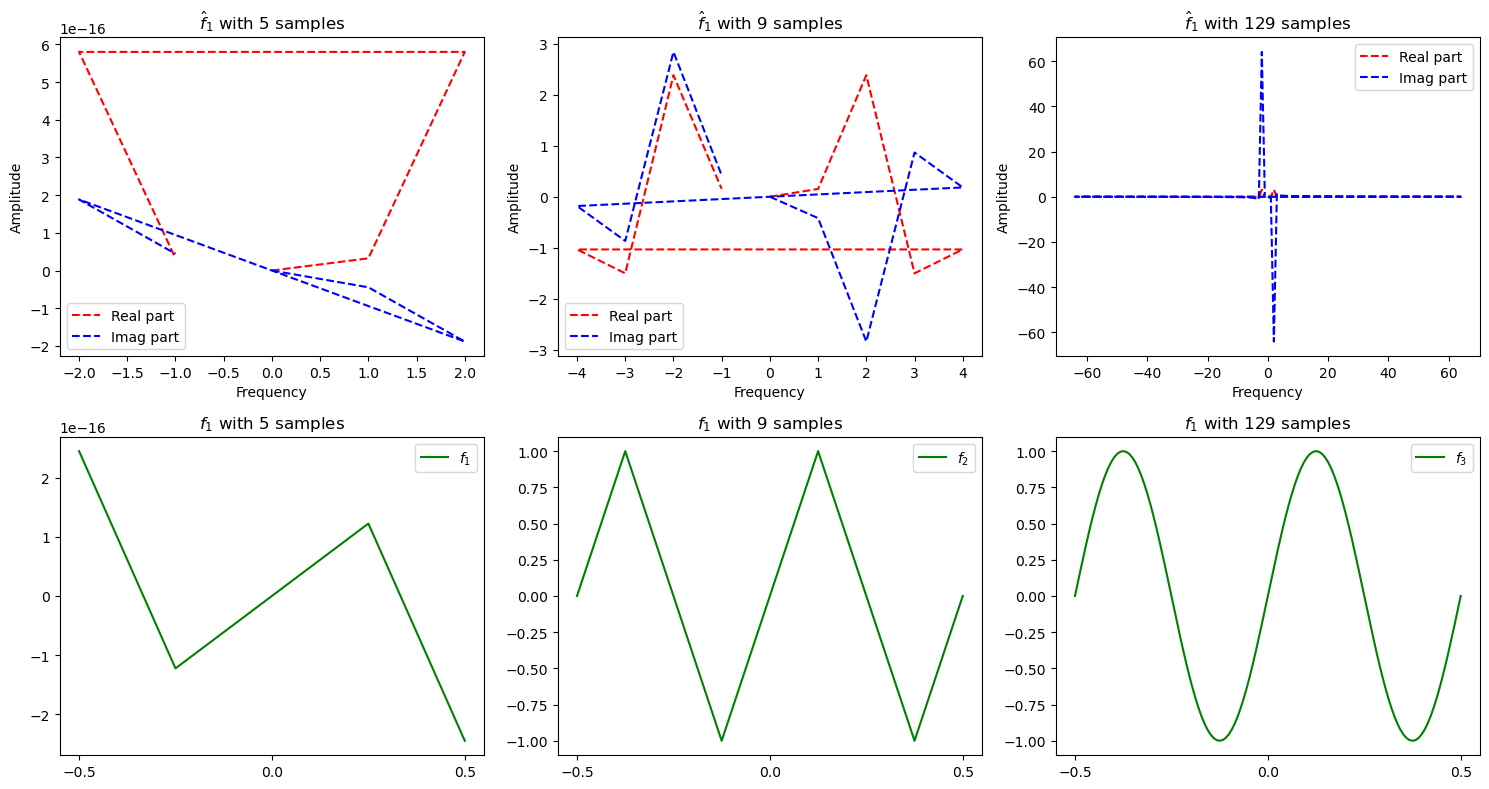

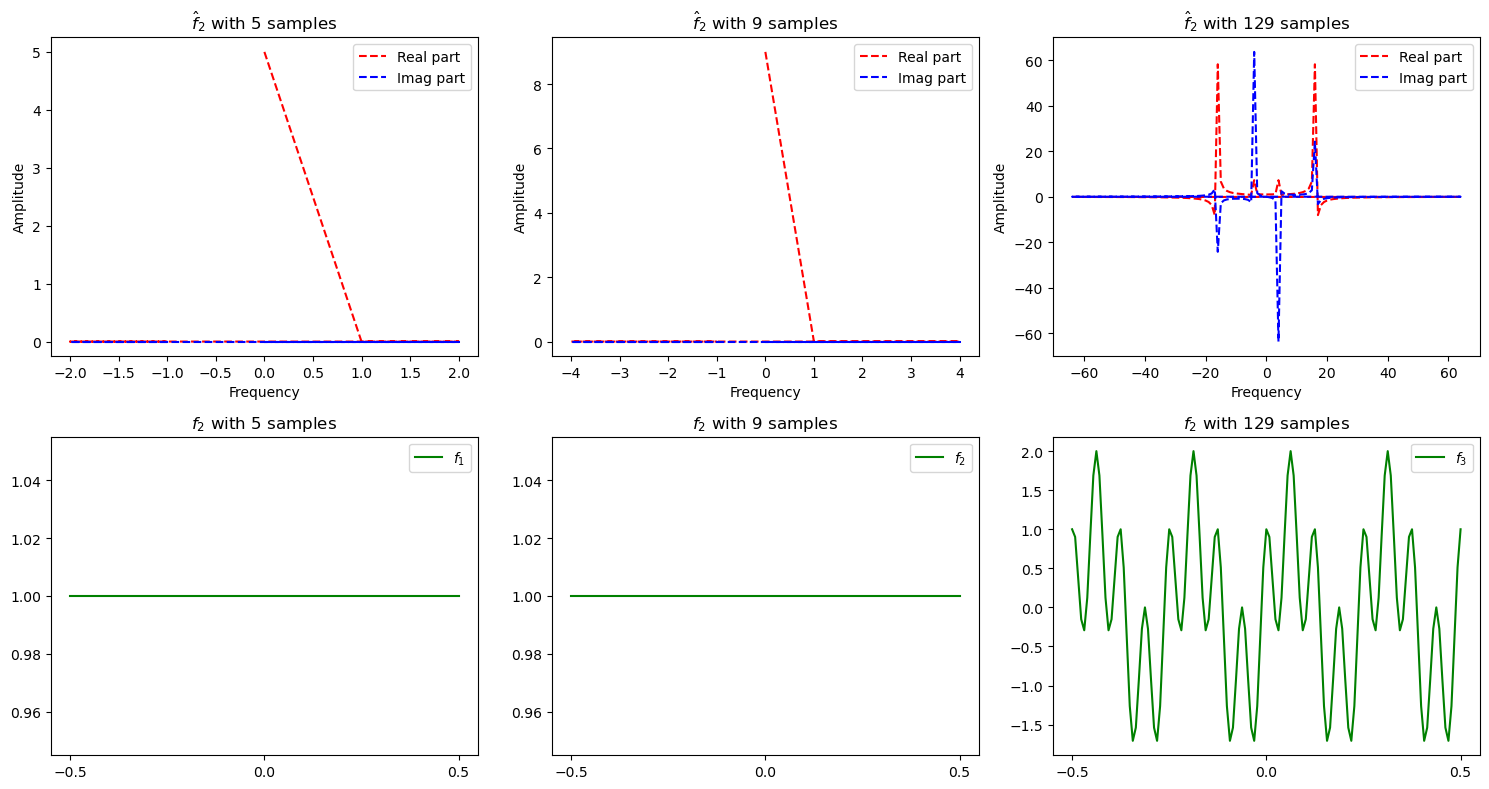

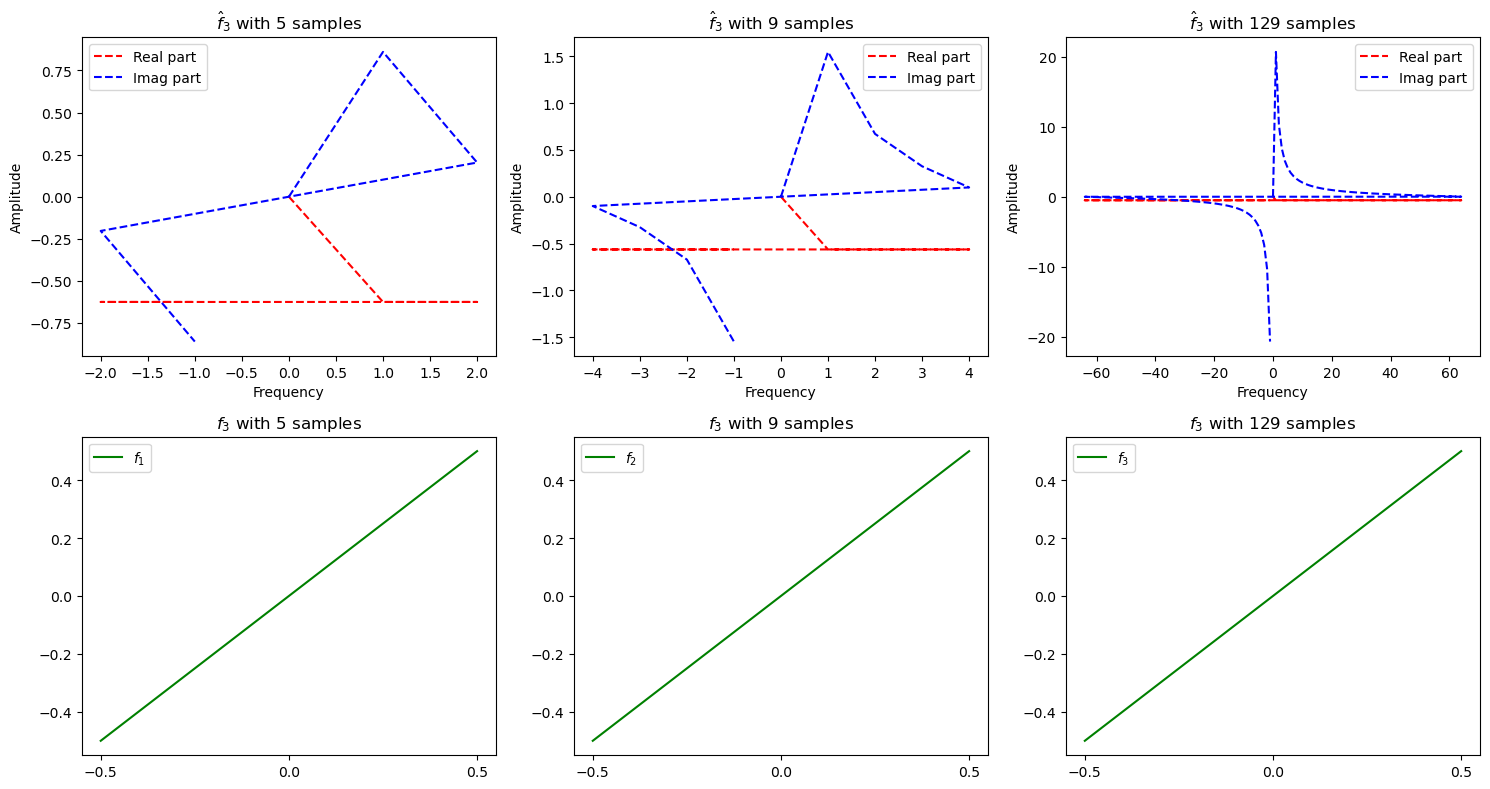

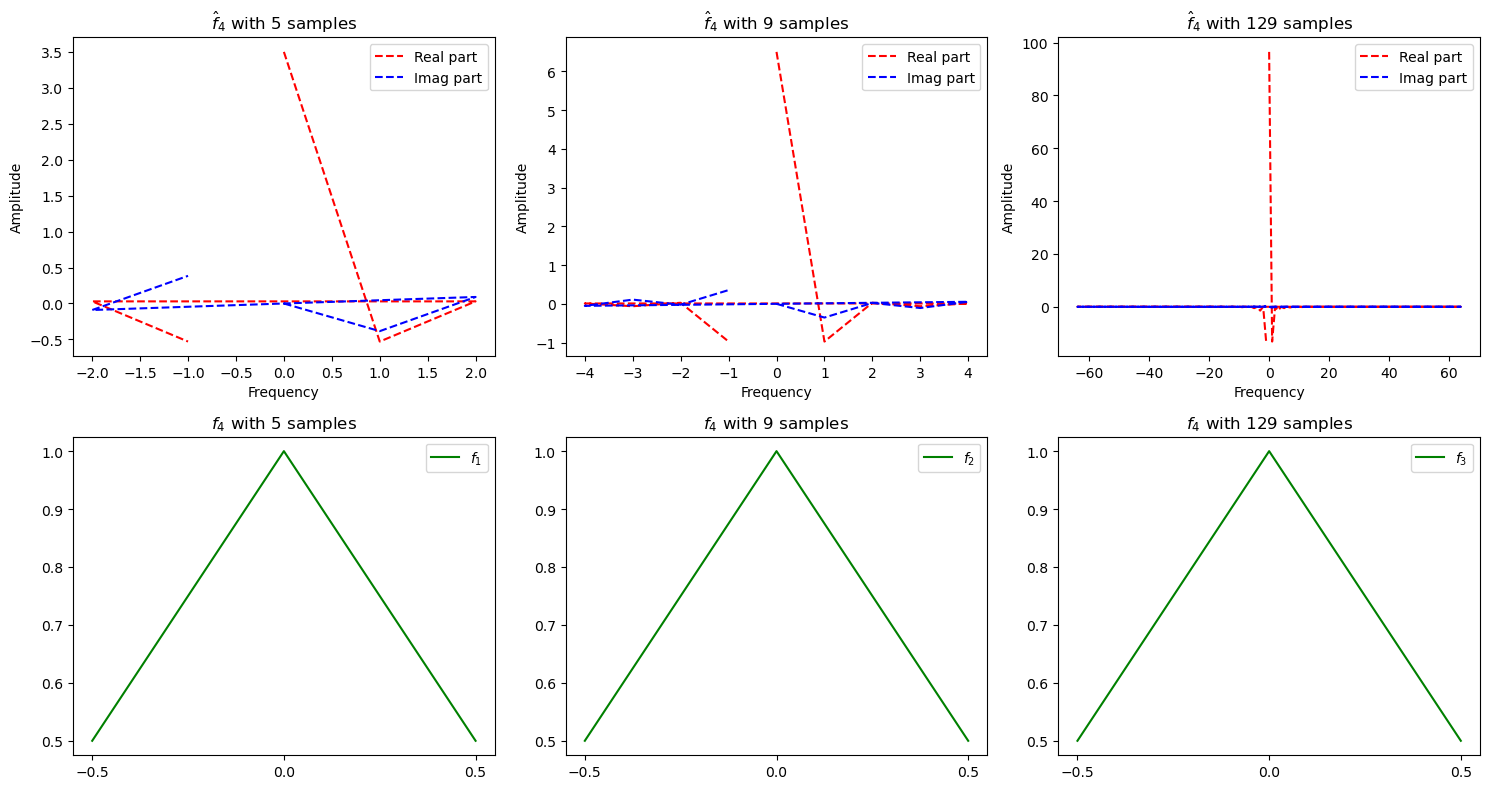

In [130]:

def transform(f, N: int, start = 0.0):
    #periodic around -0.5 and 0.5 with N samples
    return scipy.fft.fft(f(np.linspace(start - 1/2,start + 1/2, N)))


#creates the functions
def f_1(x):
    return np.sin(4* np.pi *x)
def f_2(x):
    return np.sin(8 *np.pi*x)+ np.cos(32 * np.pi * x)
def f_3(x):
    return x
def f_4(x):
    return 1- np.abs(x)

#creates the N values, and the functions in an array
N_arr = [5, 9, 129]
f_arr = [f_1, f_2, f_3, f_4]


for i in range(4):
    fig, axs = plt.subplots(2, 3, figsize=(15, 8))
    # fig.tight_layout()
    for j in range(3):
        #transforms the given function with the given amount of samples
        f_hat = transform(f_arr[i], N_arr[j])
        x = np.linspace(-1/2, 1/2, N_arr[j])
        freq = np.fft.fftfreq(N_arr[j], 1/N_arr[j])
        #just plotting
        axs[0,j].plot(freq, np.real(f_hat), 'r--', label='Real part')
        axs[0, j].plot(freq, np.imag(f_hat), 'b--', label='Imag part')
        axs[0, j].set_title(f'$\\hat{{f}}_{{{i+1}}}$ with {N_arr[j]} samples')
        axs[0, j].legend()
        axs[0,j].set_ylabel('Amplitude')
        axs[0,j].set_xlabel('Frequency')
        #axs[0, j].set_xticks([-1/2, 0, 1/2])
        
        axs[1, j].plot(x, f_arr[i](x), 'g-', label=f'$f_{{{j+1}}}$')
        axs[1, j].set_title(f'$f_{{{i+1}}}$ with {N_arr[j]} samples')
        axs[1, j].legend()
        axs[1, j].set_xticks([-1/2, 0, 1/2])

        plt.tight_layout()

Here we have 4 different subplots each representing the different functions and its fourier transform with the real and imaginary parts. 

We see that with lower samples the fourier coefficants are out and about, there is little to no connection and there seems to be a lot of mess. Except for N = 129, we see that all the function are well approximated. for $f_3$ and $f_4$ we see that the sample size N = 5, 9 is enough to define the function but the fourier transform still makes little to no sense. 

### j)


we know that when we do the FFT we some times get a real part and an imaginary part, with the euler identity and fourier transform definition we know that the $a_k$ coefficant will be in front the cosine part and $b_k$ in front of the imaginary part (euler identity). The coefficant are dependent of the sample we are at we will get an array of $a_k = a_0, a_1, ..., a_N$ and $b_k = b_0, b_1,...,b_N$

we also know from earlier courses (TMA4115) that $c_k = \sqrt{a_k^2+b_k^2}$ when going from cosine and sinus part to euler identity

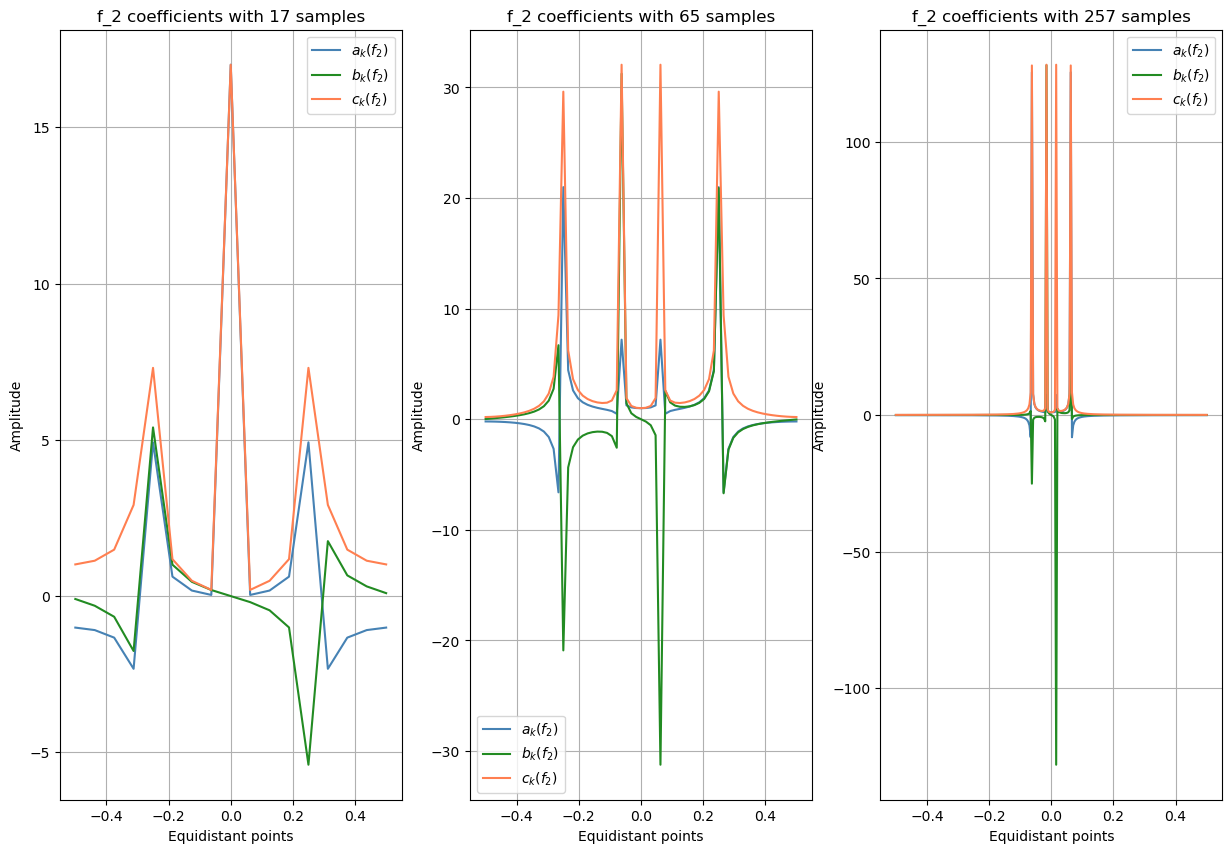

In [131]:
N_arr = [17,65,257]
fig, axs =plt.subplots(1,3, figsize = (15, 10))
for i in range(3):
    x = np.linspace(-0.5, 0.5, N_arr[i])
    f = transform(f_2,N_arr[i])
    f_hat = scipy.fft.fftshift(f)
    axs[i].set_title(f'f_2 coefficients with {N_arr[i]} samples')
    a_k = np.real(f_hat)
    b_k = np.imag(f_hat)
    c_k = np.sqrt(a_k**2 + b_k**2)
    axs[i].plot(x , a_k,color = 'steelblue', label = f'$a_k(f_2)$')
    axs[i].plot(x , b_k,color = 'forestgreen', label = f'$b_k(f_2)$')
    axs[i].plot(x , c_k,color = 'coral', label = f'$c_k(f_2)$')
    axs[i].set_xlabel('Equidistant points')
    axs[i].set_ylabel('Amplitude')
    axs[i].grid(True)
    axs[i].legend()

    

the fftshift function takes the fast fourier transform and shifts it so that the zero-frequency component goes to the center of the spectrum. In the plot above we see the fourier coefficants plottet where the local minimas and maximas are towards the center (x=0). which makes it a lot easier to analyze and also use for computations. We can do this since its T periodic so shifting the function just shows a different part of the period in the center.


knowing that a fourier transformation can we written as
$$
f(x) = a_0 + \sum_{k=1}^{N-1} \left( a_k \cos(2\pi kx) + b_k \sin(2\pi kx) \right)
$$

if we look at k = 4, we see that $b_k = 1$ and we get that the function is $sin(8\pi x)$ which will be the first part of the function. and we see that for k = 16 and $a_k = 1$ we get that the function is $cos(32\pi x)$ which will be the second part of the function. so if we set $a_4 = 0$ and $b_{16} = 0$ we will remove the second summand of the function.

techincally we can still build up the same conditions as mention earlier where $a_{16} = b_4 = 1$ and the rest is zero, but when looking at the graph above we see that for N = 17 the graph is different from the other N values, so we can conclude that the function is not well approximated by the fourier transform with N = 17.

## Task 2: Signal processing

### a)
The cyclic convultion of two vectors given by:
$$
(\bold{a} * \bold{b})_j = \sum_{k=0}^{N-1}a_k b_{j-k \space mod \space N} = \bold{c}
$$
With $\bold{c}$ being a vector, and when we use $\bold{b'} = (b_{N-1}, b_0, b_1, ..., b_{N-2} )$ instead of the normal $\bold{b} = (b_0, b_1, ..., b_{N-1})$ we get a $\bold{c'}$ which is shifted the same way.

Lets say $\bold{c} = (c_0, c_1, ..., c_{N-1})$ then $\bold{c'} = (c_{N-1}, c_0, c_1, ..., c_{N-2} )$

To show this we have a shortened down example down below.

In [132]:
a_arr = ['a_0', 'a_1', 'a_2', 'a_3']
b_arr = ['b_0', 'b_1', 'b_2', 'b_3']
b_arr_marked = ['b_3', 'b_0', 'b_1', 'b_2']
c = []
c_marked = []
N = 4

for j in range(N):
    summen = summen_marked = ''
    for k in range(0,N-1):
        summen += a_arr[k]+ b_arr[j-k%N]
        summen_marked += a_arr[k]+ b_arr_marked[j-k%N]
    c.append(summen)
    c_marked.append(summen_marked)

print(c)
print(c_marked)

['a_0b_0a_1b_3a_2b_2', 'a_0b_1a_1b_0a_2b_3', 'a_0b_2a_1b_1a_2b_0', 'a_0b_3a_1b_2a_2b_1']
['a_0b_3a_1b_2a_2b_1', 'a_0b_0a_1b_3a_2b_2', 'a_0b_1a_1b_0a_2b_3', 'a_0b_2a_1b_1a_2b_0']


we see that c[i-1] = c_marked[i] with python indexing. So the coded shows that when using a shifted b we simple get a shifted c.

### b)


We have convolution given by
$$ 
(f*g)(x) = \int_T f(y)g(x-y) dx = \int_0^1 f(y)g(x - y) dy
$$
Moving on from this we have the fourier coefficent given by
$$
c_k (f) = \int_T f(x) e^{-ikx} dx
$$
and then combining them gives us
$$
c_k(f*g) = \int_T (f*g) e^{-ikx} dx = \int_T (\int_0^1 f(y)g(x - y) dy)e^{-ikx} dx
$$
With the help of fubini theorem we get
$$
c_k(f*g) = \int_T f(y) ( \int_T f(x-y) e^{-ikx} dx) dy
$$
If we do a variable change and introduce $z = x-y$ and $dx = dz$, we have
$$
c_k(f*g) = \int_T f(y) ( \int_T f(z) e^{-ik(z+y)} dz) dy = 
\int_T f(y) e^{-iky} ( \int_T f(z) e^{-ikz} dz) dy 
$$
which we see simply is $ c_k(f*g) = c_k(f) c_k(g) $

We have seen the definition for cyclic convolution, but we'll have a look at how $\hat{\boldsymbol{a}}$ and $\hat{\boldsymbol{b}}$

$$
\hat{\boldsymbol{a}}_j = \sum_{n=0}^{N-1} a_n \left(e^{-2 \pi i j n /N}     \right)
$$

$$
\hat{\boldsymbol{b}}_j = \sum_{n=0}^{N-1} b_n \left(e^{-2 \pi i j n /N}     \right)
$$
putting this together with the convolution we get

$$
\widehat{(\boldsymbol{a} * \boldsymbol{b})}_m = \sum_{n=0}^{N-1} (a*b)_n e^{-i 2 \pi m n /N}
$$
$$
\widehat{(\boldsymbol{a} * \boldsymbol{b})}_m = \sum_{n=0}^{N-1} \left(\sum_{k=0}^{N-1} a_k b_{m-k \space mod \space N} \right) e^{-i 2 \pi m n /N} = \sum_{k=0}^{N-1} a_k \left( \sum_{n=0}^{N-1} b_{m-k \space mod \space N} e^{-i 2 \pi m n /N}\right)
$$
We see that the sum from $n=0$ to $N-1$ is a shifted fourier transform of b, so we use that its periodic and shift it back
$$
\widehat{(\boldsymbol{a} * \boldsymbol{b})}_m = \sum_{k=0}^{N-1} a_k e^{-i 2 \pi m n /N} \hat{\boldsymbol{b}}_m = \hat{\boldsymbol{a}}_m \circ \hat{\boldsymbol{b}}_m
$$

Calculating the dot product of two vectors simplifies computations a lot, since working with cyclic convolution is an $n^2$ operation while the product only is an $n$ operation. By defining the filter in the discrete Fourier domain, we can perform element-wise multiplication in the frequency domain, which corresponds to convolution in the time domain.


### c)

The de-la-Vallée-Poussin mean $ V_{n,m}(x) $ is given by:
$$
V_{n,m}(x) = \frac{1}{2n} \left( 1 + 2 \sum_{k=1}^{n-m} \cos(2\pi k x) + 2 \sum_{k=n-m+1}^{n+m-1} \frac{m+n-k}{2m} \cos(2\pi k x) \right)
$$

To compute the Fourier coefficients $ c_k(V_{n,m}) $, we integrate the product of $ V_{n,m}(x) $ and $ e^{-2\pi i k x} $ over the interval $[0, 1]$:
$$
c_k(V_{n,m}) = \int_0^1 V_{n,m}(x) e^{-2\pi i k x} \, dx = 
$$
$$
\frac{1}{2n} \left( \int_0^1 e^{-2\pi i k x} \, dx + 2 \sum_{k=1}^{n-m} \int_0^1 \cos(2\pi k x) e^{-2\pi i k x} \, dx + 
2 \sum_{k=n-m+1}^{n+m-1} \frac{m+n-k}{2m} \int_0^1 \cos(2\pi k x) e^{-2\pi i k x} \, dx \right) 
$$
we see that the two integrals we are left to solve are
$
\int_0^1 e^{-2\pi i k x} \, dx
$
and 
$
\int_0^1 \cos(2\pi k x) e^{-2\pi i k x} \, dx
$, 
 starting off we have
$$
\int_0^1 e^{-2\pi i k x} \, dx = \left[ \frac{e^{-2\pi i k x}}{-2\pi i k} \right]_0^1 = \frac{e^{-2\pi i k} - 1}{-2\pi i k} = 0
$$
since $e^{-2\pi i k} = 1$ for all $k \in \mathbb{Z}$, and the second integral is 
$$
\int_0^1 \cos(2\pi k x) e^{-2\pi i k x} \, dx = \left[\frac{\frac{i e^{-i4 \pi k x}}{4 \pi k}+x}{2} \right]_0^1 = \frac{\frac{i e^{-i4 \pi k} - 1}{4 \pi k} + 1}{2} = \frac{1}{2}
$$
this gives us that 
$$
c_k(V_{n,m}) = \frac{1}{2n} \left( 0 + 2 \sum_{k=1}^{n-m} \frac{1}{2} + 2 \sum_{k=n-m+1}^{n+m-1} \frac{m+n-k}{2m} \frac{1}{2} \right) = \frac{1}{2n} \left( n-m + 2m -1 \right) 
= \frac{n+m-1}{2n}
$$

moving over an looking at what happens when using equidistant samples 
$$
\left( d_j := V_{n,m}\left( \frac{j}{N} \right) \right), \left( j = 0, \ldots, N-1 \right) 
$$
as a filter, it is more efficient to define it directly in the discrete Fourier domain. The DFT of the samples $d_j$ is given by:
$$
\hat{d}_k = \sum_{j=0}^{N-1} d_j e^{-2\pi i k j / N}
$$
By defining the filter in the discrete Fourier domain, we can perform element-wise multiplication in the frequency domain, which corresponds to convolution in the time domain, as mentioned before. This approach is computationally efficient and leverages the Fast Fourier Transform (FFT) algorithm. 

Given the Fourier coefficients $c_k(V_{n,m})$, we can compute the Discrete Fourier Transform (DFT) of the samples $d_j$ as:
$$
\hat{d}_k = \sum_{j=0}^{N-1} d_j e^{-2\pi i k j / N}
$$

This allows us to apply the filter efficiently in the frequency domain. By multiplying the DFT of the signal with the DFT of the filter, we achieve the convolution in the time domain. This method significantly reduces the computational complexity compared to direct convolution, especially for large datasets.


### d)


Here we have implemented the de la Vallée-Poussin mean filter $V_{n,m}(x)$ as a function. We use this to convolve the sample. Instead of taking the de la Vallée-Poussin mean filter directly in the frequency domain, we calculate the filter in the time domain and then apply the fast fourier transfor. 

When having a look at what happens when increasing the m parameter, there is implemented a for loop to iterate over different m values to have a look at what happens to the signal.

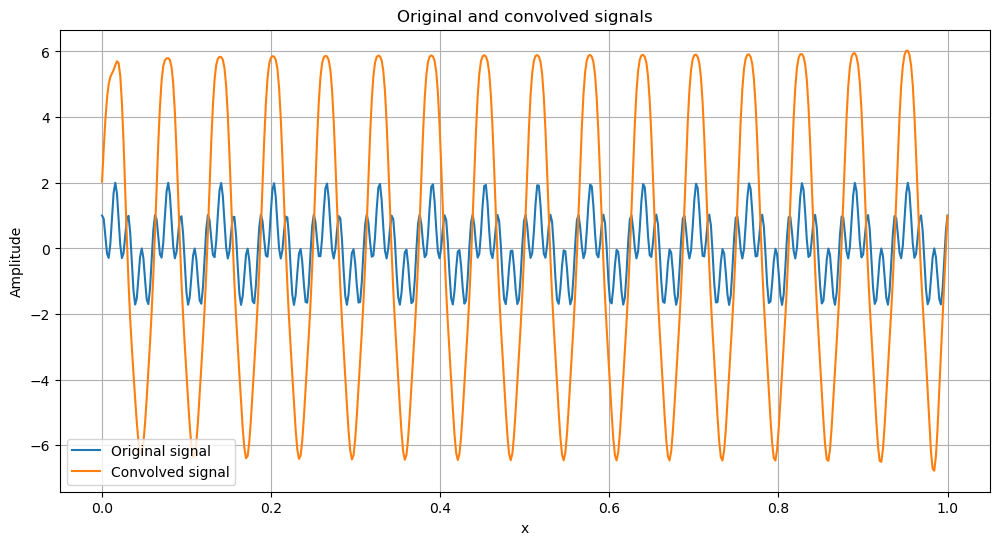

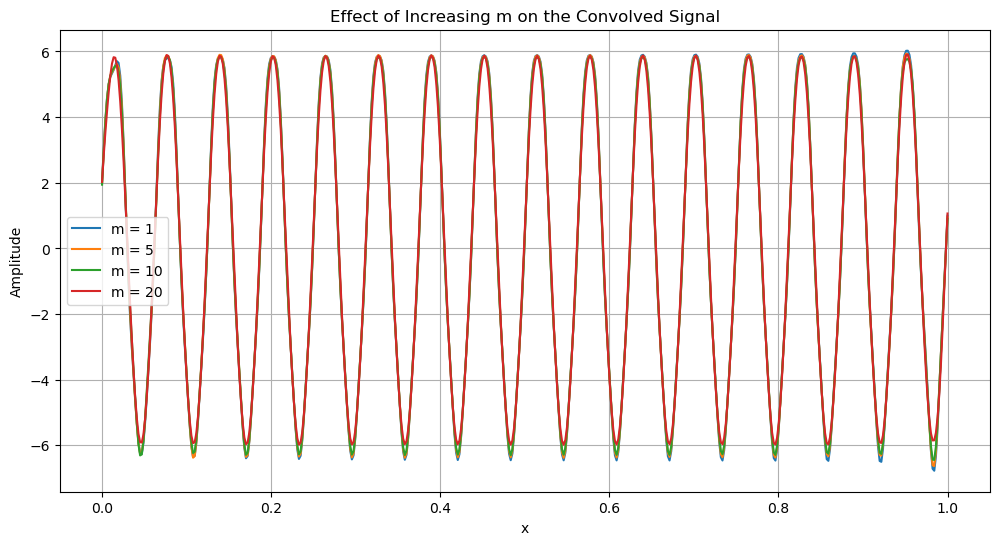

In [133]:
def f_5(x):
    return np.sin(32 * np.pi * x)+ np.cos(128 * np.pi * x)
N = 512
n = 48
m = 1

#computing f_hat like we did in task 1 item i
f = f_5(np.linspace(-1/2, 1/2, N))
f_hat = transform(f_5, N)


#computing V_nm
def V_nm(x, n, m):
    V = np.ones_like(x) / (2 * n)
    for k in range(1, n - m + 1):
        V += (1 / n) * np.cos(2 * np.pi * k * x)
    for k in range(n - m + 1, n + m):
        V += (1 / (2 * n)) * ((m + n - k) / (2 * m)) * np.cos(2 * np.pi * k * x)
    return V

x = np.linspace(0, 1, N) #equidistant points
V = V_nm(x, n, m)
V_hat = scipy.fft.fft(V)

#use dot product on the vectors for the fourier transforms instead of convolution
convolved_hat = f_hat * V_hat
#going back to the time domain
convolved = scipy.fft.ifft(convolved_hat)

plt.figure(figsize=(12, 6))
plt.plot(x, f, label='Original signal')
plt.plot(x, np.real(convolved), label='Convolved signal')
plt.legend()
plt.title('Original and convolved signals')
plt.xlabel('x')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

#calculating the effect of increasing m
m_arr = [1, 5, 10, 20]
plt.figure(figsize=(12, 6))
for m in m_arr:
    V = V_nm(x, n, m)
    V_hat = scipy.fft.fft(V)
    convolved_hat = f_hat * V_hat
    convolved = scipy.fft.ifft(convolved_hat)
    plt.plot(x, np.real(convolved), label=f'm = {m}')

plt.legend()
plt.title('Effect of Increasing m on the Convolved Signal')
plt.xlabel('x')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

we see that after the convolution the periodic maximas and minimas are well-defined, but the quick "dips" in the original function is not conserved.

we see that by increasing m we have very little difference, when iterating thru $m = {[1, 5, 10, 20]}$ we see small differences in the functions, except some lower amplitudes for lower m. 

### e)

To read from the csv file i have copied the code from python.org and modified it to fit the task. The signal is modified and only takes the right column from the signal file, because the left column consist of equidistant points from 0 to 1, thus a numpy linspace array does the exact same. After taking a fast fourier transform on the signal and both filters we can multiply the filters with the signal and then take the inverse fast fourier transform to get the filtered signal.

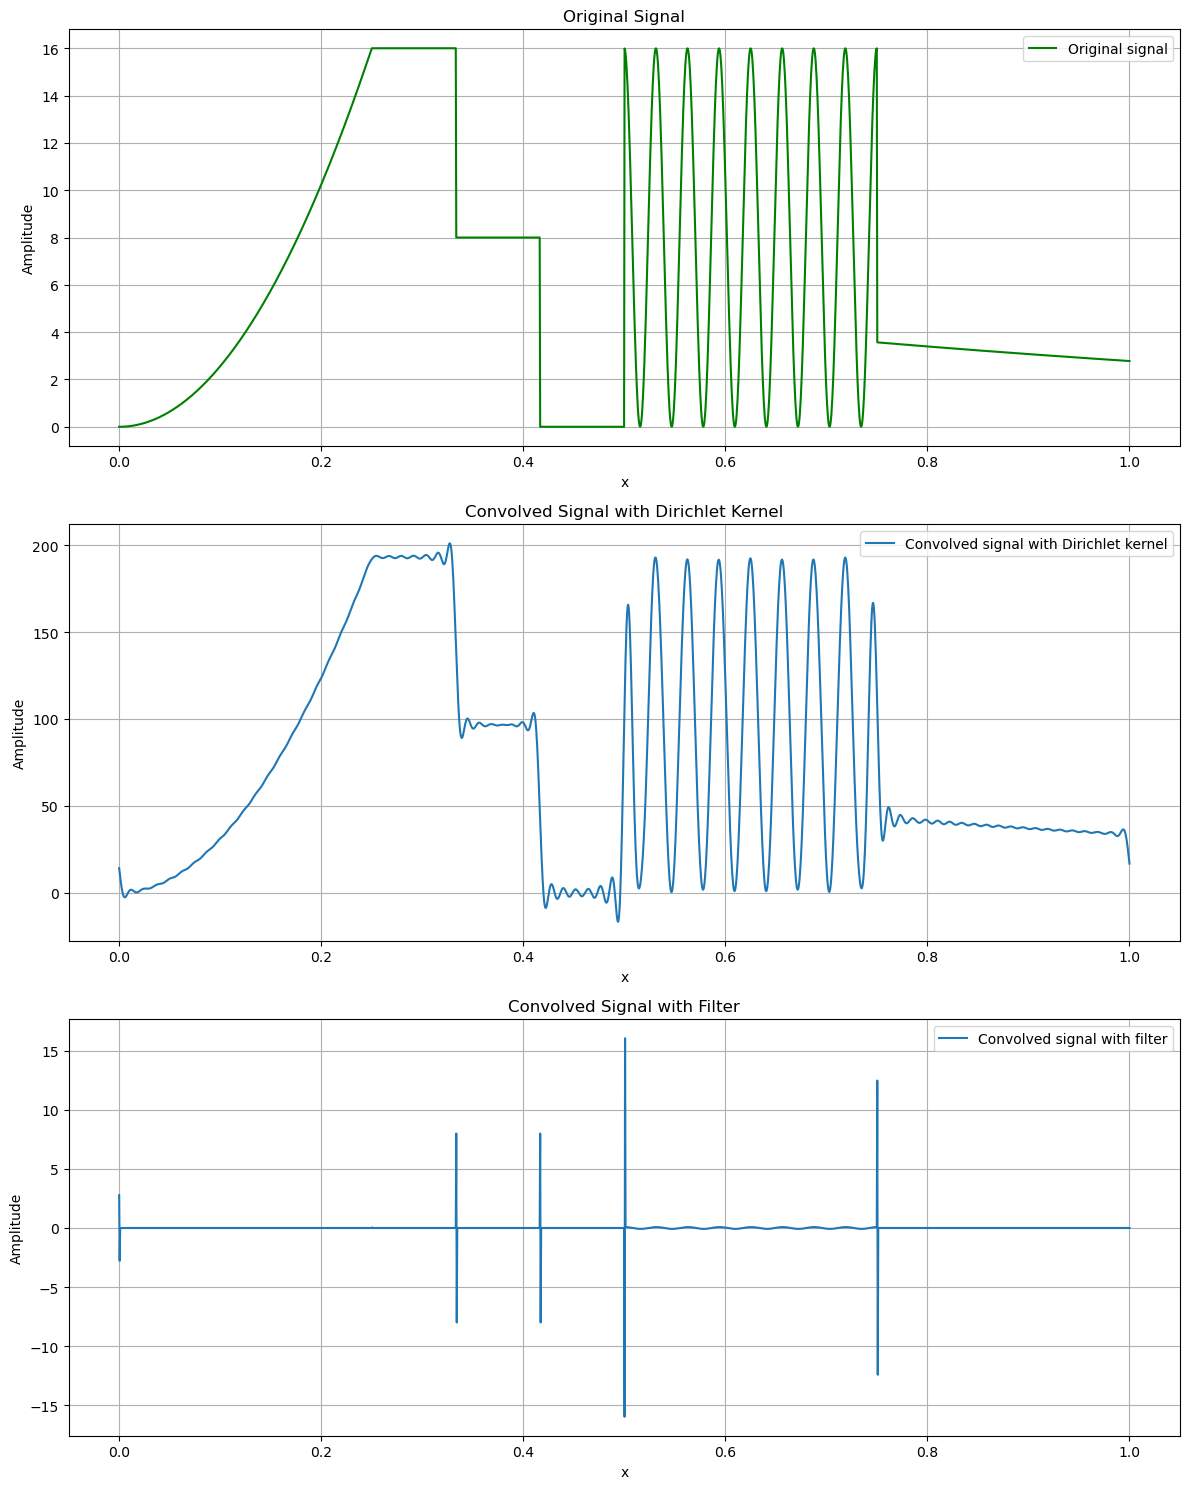

In [134]:
#read from csv file
import csv #using exact way of reading from csv as on python.org
with open('project1-signal-data.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    signal = []
    next(spamreader)  # Skip the header row
    for row in spamreader:
        values = row[0].split(',')  # Split the row by commas
        for value in values:
            signal.append(float(value))
signal = signal[1::2] #extract the signal values from the csv file and not the x values 

N = len(signal)
n = 92
m = 10
x = np.linspace(0,1, N) #equidistant points
V = V_nm(x, n, m) 

h = np.zeros(N)
h[0], h[1], h[2] = -1, 2, -1

V_hat = scipy.fft.fft(V) #this gives us the Dirichlet kernel
signal_hat = scipy.fft.fft(signal) #this gives us the signal in the frequency domain
h_hat = scipy.fft.fft(h) #this gives us the filter in the frequency domain

#convolution in the frequency domain
convolved_hat_Dirichlet = signal_hat * V_hat
convolved_hat_filtered = signal_hat * h_hat

#going back to the time domain
convolved_Dirichlet = scipy.fft.ifft(convolved_hat_Dirichlet)
convolved_filtered = scipy.fft.ifft(convolved_hat_filtered)

fig, axs = plt.subplots(3, 1, figsize=(12, 15))

# Plot original signal
axs[0].plot(x, signal, 'g-', label='Original signal')
axs[0].legend(loc='upper right')
axs[0].set_title('Original Signal')
axs[0].set_xlabel('x')
axs[0].set_ylabel('Amplitude')
axs[0].grid(True)

# Plot convolved signal with Dirichlet kernel
axs[1].plot(x, np.real(convolved_Dirichlet), label='Convolved signal with Dirichlet kernel')
axs[1].legend(loc='upper right')
axs[1].set_title('Convolved Signal with Dirichlet Kernel')
axs[1].set_xlabel('x')
axs[1].set_ylabel('Amplitude')
axs[1].grid(True)

# Plot convolved signal with filter
axs[2].plot(x, np.real(convolved_filtered), label='Convolved signal with filter')
axs[2].legend(loc='upper right')
axs[2].set_title('Convolved Signal with Filter')
axs[2].set_xlabel('x')
axs[2].set_ylabel('Amplitude')
axs[2].grid(True)

plt.tight_layout()
plt.show()

In the plots we compare both the kernel $h = [-1, 2, -1, 0 ... 0]$ and the Dirichlet kernel and what they have done with the signal at hand. We see that the Dirichlet kernel does a great job at approximating the signal, but with much higher amplitudes. The kernel h shows where the signal goes thru bigger frequency changes and how high the amplitudes are. 

When using the to filters to analyze the signal, the h kernel is great for looking at the amplitudes and the big changes in the signal, while the Dirichlet kernel is great for looking at the periodic changes in the signal and how it evolves with time.

## Task 3: Sound processing

### a)

A sine function works like $f(x) = A sin(kx + \phi)$ where A is the amplitude, k the wavenumber and $\phi$ the faseshift.
k can be computed by $ k = \frac{2 \pi}{\lambda} $ or $ k = 2 \pi f $.

Also what goes in as a variable in a sinus function needs to be dimensionless. so if we have lambda, x is probably in meters, and when we have f, x is probably in seconds.

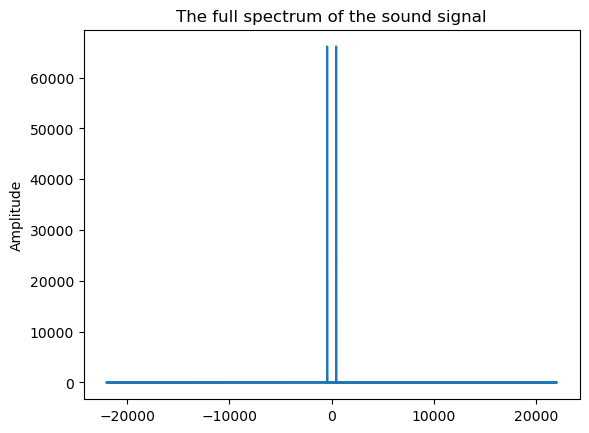

In [135]:
frequency = 440
sample_rate = 44100
T = 3

t = np.linspace(0, T, T * sample_rate)
sound = np.sin(2 * np.pi * frequency * t)
sound_hat = scipy.fft.fft(sound)
freq = scipy.fft.fftfreq(len(sound), 1/sample_rate)
plt.plot(freq,np.abs((sound_hat)))
plt.title('The full spectrum of the sound signal')
plt.ylabel('Amplitude')
plt.show()

Here we see that there are a well defined peak at a given frequency, but with such a long axis its only possibly to give a rough estimate of the frequency.

In [136]:
#code for playing the sound
sd.play(sound, sample_rate)
print(f'the length of the sound is {len(sound)/sample_rate} seconds')
sd.wait()

the length of the sound is 3.0 seconds


### b)
Here we slice the signal in the plotting, as well as the frequency. Since we in the last task saw that the frequency was only in a smaller window.

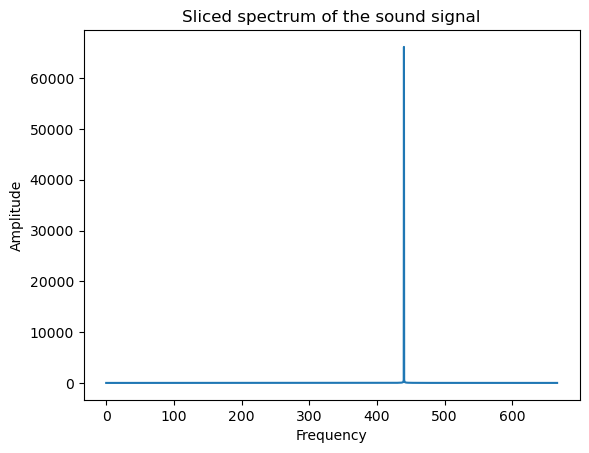

In [137]:
sound = np.sin(2 * np.pi * frequency * t)
sound_hat = scipy.fft.fft(sound)
freq = scipy.fft.fftfreq(len(sound), 1/sample_rate)


plt.plot(freq[:2000],np.abs((sound_hat)[:2000]))
plt.title('Sliced spectrum of the sound signal')
plt.ylabel('Amplitude')
plt.xlabel('Frequency')
plt.show()

In this plot one can easly see the that the frequency is around 440 Hz, and in combination with task 3 item a we can conclude that the frequency only is 440 Hz.

### c)


Here we do a short-time fourier transform, also called STFT. Using the spectrum and phase to reconstruct the signal, we can overlap parts of the signal to make it faster without changing the pitch. This is done by doing the fast fourier transform on parts of the signal, where the size depends on the window size we choose. We can then pick how much we want it to overlap. so we get a matrix with a given size that depends on the length of the signal and the window size. We also use a window function in both the fourier transform and the inverse fourier transform to make the signal smoother.

The SFTF is very similar to the fast-fourier transform, you can actually use it to calculate the STFT. The difference is that the STFT is done on parts of the signal, and not the whole signal. It also takes use of a window function. its given in the discrete case by:
$$
\hat{f}_j = \sum_{n=0}^{M-1} w(n) f(n) e^{-2 \pi i j n / M}
$$


After doing the STFT we can calculate the spectrum and the phase of the signal with the known property 

$$
\hat{f}_j = |\hat{f_j}| e^{i \phi_j}
$$

Where the spectrum is $|\hat{f}_j|$ and the phase is $\phi_j$. we then use the difference in phase between the current and the previous signal to get the phase difference, and add it to the current phase. Since the pitch is staying the same we only change the phase, and not the spectrum.

Here we also use a window function as mentioned earlier, we use the Hann window function which is given by
$$
w(n) = 0.5 - 0.5\cos\left(\frac{2\pi{n}}{M-1}\right) \qquad 0 \leq n \leq M-1
$$

we use the implemented function in the numpy library to do the hanning window function which has one parameter which is only the length $M-1$

lastly we need to take the inverse fourier transform to get the signal back to the time domain. 




In [138]:
music_file = 'music.flac'
audio, sample_rate = sf.read(music_file)
sd.play(audio, sample_rate)

In [139]:
# Load the audio signal
audio_file = 'music.flac'
audio, sample_rate = sf.read(audio_file)

# Parameters for STFT
window_size = 1024
overlap = window_size // 2  
speed_factor = 2.0  # Speed up by a factor of 2

# Hann window to smooth the transition between windows
hanning = np.hanning(window_size)

# Function to perform STFT (Short-Time Fourier Transform)
def stft(signal, window_size, overlap):
    n_windows = (len(signal) - window_size) // overlap + 1
    #the slicing gives us windows with an overlap of the hop size
    windows = np.array([signal[i*overlap : i*overlap + window_size] for i in range(n_windows)]) 
    return np.array([scipy.fft.fft(hanning * w) for w in windows])

# Function to perform inverse STFT
def istft(stft_matrix, window_size, overlap):
    n_windows, _ = stft_matrix.shape
    output_signal = np.zeros(n_windows * overlap + window_size)
    for i, stft_row in enumerate(stft_matrix):
        output_signal[i * overlap : i * overlap + window_size] += np.real(scipy.fft.ifft(stft_row)) * hanning
    return output_signal

# Perform STFT, since music.flac is stereo, we will perform STFT on both channels
stft_matrix_left = stft(audio[:,0], window_size, overlap)
stft_matrix_right = stft(audio[:,1], window_size, overlap)

n_windows, _ = stft_matrix_left.shape #get shape of the stft matrix
phase_accumulator_left = np.angle(stft_matrix_left[0])  # Initialize phase of the first window on the left channel
new_stft_matrix = np.zeros_like(stft_matrix_left)

phase_accumulator_right = np.angle(stft_matrix_right[0])  # Initialize phase of the first window on the right channel
new_stft_matrix_right = np.zeros_like(stft_matrix_right)


# Time-stretch by modifying window positions
i = 0
scaled_i = int(i * speed_factor)
while scaled_i < n_windows:
    # Scale the window position by the speed factor
    scaled_i = int(i * speed_factor)
    if scaled_i < n_windows:
        # Left channel
        spectrum_left = np.abs(stft_matrix_left[scaled_i]) 
        phase_accumulator_left += np.angle(stft_matrix_left[scaled_i]) - np.angle(stft_matrix_left[scaled_i - 1]) #phase difference between the current and previous window
        new_stft_matrix[i] = spectrum_left * np.exp(1j * phase_accumulator_left)# puts it back in original form with spectrum and phase
        
        # Right channel
        spectrum_right = np.abs(stft_matrix_right[scaled_i])
        phase_accumulator_right += np.angle(stft_matrix_right[scaled_i]) - np.angle(stft_matrix_right[scaled_i - 1]) #phase difference between the current and previous window
        new_stft_matrix_right[i] = spectrum_right * np.exp(1j * phase_accumulator_right) # puts it back in original form eith spectrum and phase
    i += 1

# Perform inverse STFT to get the time-domain signal back
faster_audio_left = istft(new_stft_matrix, window_size, overlap)
faster_audio_right = istft(new_stft_matrix_right, window_size, overlap)

# Combine left and right channels
faster_audio = np.vstack((faster_audio_left, faster_audio_right)).T

# Play the faster audio
sd.play(faster_audio, sample_rate)


In the code we see that both the fourier transforms are done in a different way, this is because of the overlapping parts of the signal. The slicing in the function stft makes it so that the signal is divided, where the first row is from index 0 to M, the second row is from index M/2 to 3M/2 and so on, and the same goes for the function istft. The combining of the signal is done by adding the difference in the phase to the previous phase, this makes the signal stay in the same pitch and also change the speed of the music.

The final product is the same as music.flac but with a faster tempo and the same pitch.

### d)


In this function we use the same concept as in the task before. We split the fourier transform into spectrum and phase, and then we double the phase, instead of using phase differeneces. We then use the inverse fourier transform to get the signal back to the time domain.

In [140]:
audio_file = 'music.flac'
audio, sample_rate = sf.read(audio_file)
n = audio.shape[0]
hanning = np.hanning(n)

left_audio = audio[:, 0]
right_audio = audio[:, 1]

left_audio_hat = scipy.fft.fft(left_audio*hanning) 
right_audio_hat = scipy.fft.fft(right_audio*hanning)


spectrum_left =np.abs(left_audio_hat)
phase_left  = np.angle(left_audio_hat)

spectrum_right = np.abs(right_audio_hat) 
phase_right = np.angle(right_audio_hat)

octaved_audio_left = spectrum_left * np.exp(1j * phase_left*2) 
octaved_audio_right = spectrum_right * np.exp(1j  * phase_right *2)

octaved_audio = np.vstack((scipy.fft.ifft(octaved_audio_left).real, scipy.fft.ifft(octaved_audio_right).real)).T

sd.play(octaved_audio, sample_rate)

The pitch sounds be taken an octave higher, my pitch isnt perfect, but im certain its higher. The speed is also the same as the original signal, so we have achieved the goal of the task. But there is a lot of noise, and the signal is not as clear as the original signal, so there is room for improvement.

### e)

The Play_per_sample function takes in a parameter L, which is both the divisor for the sample rate and also for the downsampling of the audio array. Since if we were to keep the audio array at the same size while lowering the sample rate we would change the speed of the audio.

Iterating thru less signals per time with the same array will alter the speed, hence a downsampling is necesarry. 

with n = 2 we look at the sample rate = 44100/2 = 22050 kHz

and with n = 4 we look at the sample rate = 44100/4 = 11025 kHz

and with n = 8 we look at the sample rate = 44100/8 = 5512 kHz

In [141]:
def play_per_sample(n):
    music_file = 'music.flac'
    audio, sample_rate = sf.read(music_file)
    sd.play(audio[::n], samplerate = int(sample_rate/n)) #divides sample by n
play_per_sample(4) 

We hear a clear difference on the different sample rates. A non-mathemathical answer would be that it feels like listening to a concert really far away when we look at 11025/5012 Hz. The difference we hear can be explained by removing samples, we might remove high frequency sounds, which makes the sound more muffled. Also its not only the high frequency sounds that are removed, but also the alternation of the sound, which gives it the feeling of a concert far away.




### f)


In [142]:
noisy_file = 'noisy.flac'
noisy, sample_rate_noisy = sf.read(noisy_file)
print(f'the sample rate is {sample_rate_noisy}, and it takes {noisy.shape[0]/sample_rate_noisy} seconds')
sd.play(noisy, sample_rate_noisy)

the sample rate is 16000, and it takes 5.285 seconds


We see that the sample rate is 16 kHz which is approximatly the same as the sample rate divided by 4 in the previous task. This result is easy to relate to the observations of the last task since its muffeled, and you cant hear anything clearly. But in the last task we could still hear the music, but the noisy.flac is clearly affected by something else than just a downsampling.

### g)

To denoise in this task we have chosen to go with both the de-la-Valêe-Poussin mean to cut off the high frequencies, and we also use the Hann window function which was described in task 3 item c. The de-la-Valêe-Poussin mean is used to cut off the high frequencies, and the Hann window function is used to make the signal smoother. We also iterate thru the frequencies and remove the low frequencies and set them to zero. We use slicing to get rid of the lower frequencies.

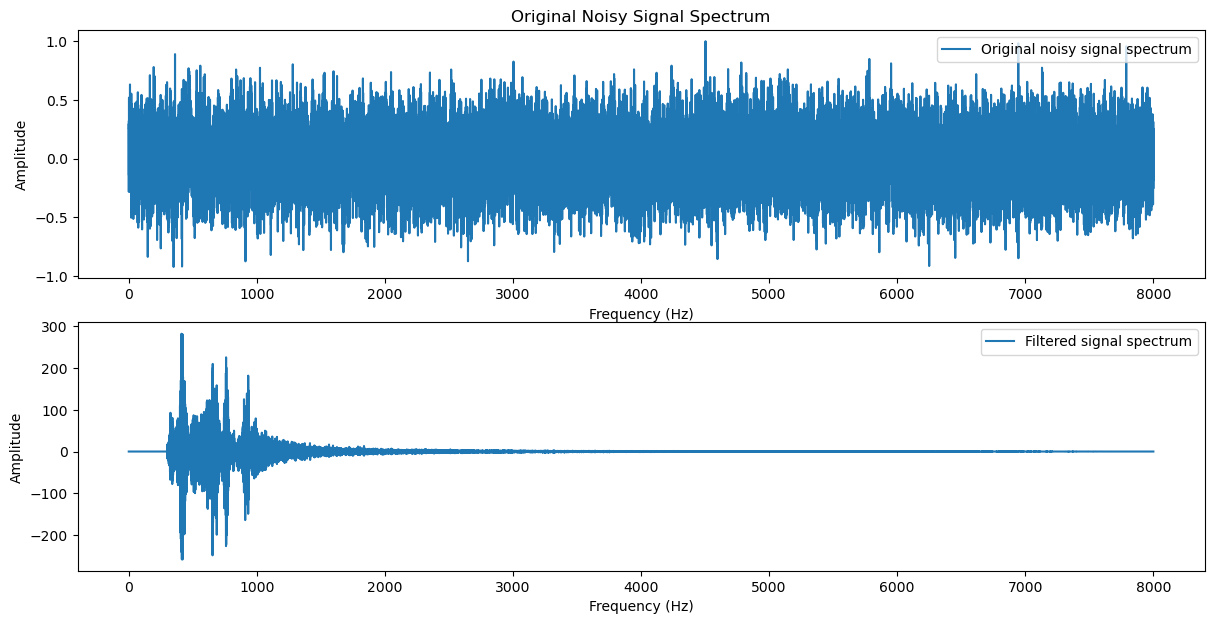

In [143]:
noisy_file = 'noisy.flac'
noisy, sample_rate_noisy = sf.read(noisy_file)

T = int(noisy.shape[0] / sample_rate_noisy)
x = np.linspace(0, 1, noisy.shape[0])
V = V_nm(x, 5000, 50)


#creating the Hann window
window = np.hanning(noisy.shape[0])
noisy_hat = scipy.fft.fft(noisy*window)
V_hat = scipy.fft.fft(V)

f_hat = noisy_hat *V_hat
# Using a de-la-Valée-Poussin mean

# Convert the cutoff frequency to the corresponding FFT index
cutoff_freq = 300  # in Hz
cutoff_index = int(cutoff_freq * noisy.shape[0] / sample_rate_noisy)

# Apply a high-pass filter by zeroing out the low frequencies (below cutoff)
f_hat[:cutoff_index] = 0
f_hat[-cutoff_index:] = 0


audio = scipy.fft.ifft(f_hat).real 
freq = scipy.fft.fftfreq(len(noisy), 1/sample_rate_noisy)

sd.play(audio, sample_rate_noisy)

n = noisy.shape[0]//2 
fig, axs = plt.subplots(2, 1, figsize=(12, 6)) 
fig.tight_layout()
axs[0].plot(freq[:n], np.real(noisy[:n]), label = 'Original noisy signal spectrum')
axs[0].set_title('Original Noisy Signal Spectrum')
axs[0].set_xlabel('Frequency (Hz)')
axs[0].set_ylabel('Amplitude')
axs[0].legend(loc = 'upper right');

axs[1].plot(freq[:n], np.real((f_hat)[:n]), label = 'Filtered signal spectrum')
axs[1].set_xlabel('Frequency (Hz)')
axs[1].set_ylabel('Amplitude')
axs[1].legend(loc = 'upper right');


By trial and error we found that m is a smoothing factor, so with a high m the signals go more together. So the effect m have is similar to a window function, but with a different approach.

we see on the plot above that we have remmoved both the high frequencies and also the low ones. 

after the denoising the signal is clearer but still very muffeled, we can hear clearly hear that its a woman talking, like in the comparison.flac, but quoting the sentence would be hard, the best guess i have would be "johnny sat down in his chair, in days without change, contemplating the result of his work", but its hard to hear and on some of the words a guess is needed.

## Conclusion
In this project we have looked at various ways of using fourier transform to analyze signals and sounds. The Fourier transform has shown itself to be essential in speeding up, denoising, as well as convolving signals.

We have also seen that the fourier transform as well as the fast fourier transform, are great tools when analyzing signals. Except for in task 3c, where manipulating the speed was the task at hand, we had to use the short-time fourier transform to convolve and manipulate it in the right way. As for task 3 item d, we got the pitch up, but in the cost of a lot of noise, so maybe using a short-time fourier transform would have been a better approach. 

We have seen that its not exactly easy to manipulate sound signals, but with the right tools it is possible to do so. It is definitly possible to manipulate and change sound with the fourier transformation, to manipulate signals to the way you want. But as we have seen in the last task, it is not always easy to get exactly the result you want, but pretty close.